# Num_class and KDE of image classification

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display
import pandas as pd

In [2]:
from src.RQ1_forecast import *

In [3]:
pd.options.display.max_columns = None

In [4]:
image_experiment_vase_path = '/datadrive2/image_classification/exp'
# we want true_y
resnet_y_csv = f'{image_experiment_vase_path}/resnet/resnet_y.csv'

In [5]:
resnet_y_df = pd.read_csv(resnet_y_csv)
resnet_y_df.head(10)

,Unnamed: 0,true_y
0,0,7
1,1,0
2,2,6
3,3,9
4,4,5
5,5,1
6,6,7
7,7,0
8,8,3
9,9,2


In [6]:
def make_acc_arr(image_df_list):
    """
    outputs vectore of accuracy of image dataframe
    """
    acc_vec = np.zeros(len(image_df_list))
    for i in range(len(image_df_list)):
        acc_vec[i] = (image_df_list[i]['Y_test'] == image_df_list[i]['y_pred']).mean()
    return acc_vec

def make_acc_arr_resnet(image_df_list):
    """
    outputs vectore of accuracy of image dataframe
    """
    acc_vec = np.zeros(len(image_df_list))
    for i in range(len(image_df_list)):
        # add a new column
        image_df_list[i]['true_y'] = resnet_y_df['true_y']
        acc_vec[i] = (image_df_list[i]['true_y'] == image_df_list[i]['y_pred']).mean()
    return acc_vec

def append_classification_df(image_df_list):
    """
    add all the predictions in the list of df to one df
    """
    for i in range(1, len(image_df_list)):
        image_df_list[0][f'y_pred_{i}'] = image_df_list[i]['y_pred']
    return image_df_list[0]
    

def add_num_class(image_df, max_pred_num=99):
    """
    add number of classes
    """
    image_df['num_class'] = [len(set(v[pd.notna(v)].tolist())) for v in image_df.loc[:,'y_pred':f'y_pred_{max_pred_num}'].values]
    return image_df


def plot_kde_numclass(model_name, dataset_name):
    """
    put everything together
    """
    image_pred_address = f'{image_experiment_vase_path}/{model_name}/{dataset_name}'
    image_pred_df = read_csv_result('pred.csv', image_pred_address) 

    # if model is resnet then we add 
    if model_name == 'resnet':
        # image_pred_df = image_pred_df.drop('Y_test')
        # image_pred_df['Y_test'] = resnet_y_df['true_y']
        prediction_acc = make_acc_arr_resnet(image_pred_df)
    else:
        prediction_acc = make_acc_arr(image_pred_df)

    all_pred_df = append_classification_df(image_pred_df)
    all_pred_df = add_num_class(all_pred_df)    

    num_class_count = all_pred_df['num_class'].value_counts()
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    plt.suptitle(f'{model_name} {dataset_name}')

    pd.DataFrame(prediction_acc).plot.kde(ax=ax[0], legend=False)
    ax[0].title.set_text('KDE of accuracy on test dataset')
    
    num_class_count.sort_index().plot.bar(ax=ax[1])
    ax[1].set_ylim(ymin=0, ymax=7500)
    ax[1].title.set_text('Histogram of number of different classes predicted by 100 seeds for each test image.')
    
    plt.savefig(f'/home/dev/deepts/plots/image_classification/analysis/analysis_{model_name}_cifar10.png')
    plt.show()

def plot_kde_only(model_name, dataset_name):
    """
    put everything together
    """
    font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 34}

    plt.rc('font', **font)

    image_pred_address = f'{image_experiment_vase_path}/{model_name}/{dataset_name}'
    image_pred_df = read_csv_result('pred.csv', image_pred_address) 

    # if model is resnet then we add 
    if model_name == 'resnet':
        # image_pred_df = image_pred_df.drop('Y_test')
        # image_pred_df['Y_test'] = resnet_y_df['true_y']
        prediction_acc = make_acc_arr_resnet(image_pred_df)
    else:
        prediction_acc = make_acc_arr(image_pred_df)

    all_pred_df = append_classification_df(image_pred_df)
    all_pred_df = add_num_class(all_pred_df)    

    num_class_count = all_pred_df['num_class'].value_counts()

    fig = plt.figure(figsize=(20, 10))
    # plt.suptitle(f'{model_name} {dataset_name}')
    ax = plt.axes()
    pd.DataFrame(prediction_acc).plot.kde(ax=ax, legend=False, linewidth=5.0)
    ax.set_xlim(xmin=0.834, xmax=0.945)
    # fig.title.set_text('KDE of accuracy on test dataset')
    
    # num_class_count.sort_index().plot.bar(ax=ax[1])
    # ax[1].set_ylim(ymin=0, ymax=7500)
    # ax[1].title.set_text('Histogram of number of different classes predicted by 100 seeds for each test image.')
    
    plt.savefig(f'/home/dev/deepts/plots/image_classification/analysis/kde_{model_name}_cifar10.png')
    plt.show()
    return prediction_acc

# Just get the accuracy

In [7]:
model_name = 'mobilenet'
dataset_name = 'cifar10'

image_pred_address_tmp = f'{image_experiment_vase_path}/{model_name}/{dataset_name}'
image_pred_df_tmp = read_csv_result('pred.csv', image_pred_address_tmp) 


101it [00:00, 34111.02it/s]
100%|##########| 100/100 [00:00<00:00, 376.02it/s]


In [10]:
if model_name == 'resnet':
    # image_pred_df = image_pred_df.drop('Y_test')
    # image_pred_df['Y_test'] = resnet_y_df['true_y']
    prediction_acc_tmp = make_acc_arr_resnet(image_pred_df_tmp)
else:
    prediction_acc_tmp = make_acc_arr(image_pred_df_tmp)

In [11]:
prediction_acc_tmp

array([0.8429, 0.8498, 0.8484, 0.8514, 0.8481, 0.8555, 0.8494, 0.8492,
       0.8538, 0.839 , 0.8506, 0.8428, 0.8572, 0.8535, 0.8545, 0.8496,
       0.8515, 0.8512, 0.8508, 0.8516, 0.8524, 0.849 , 0.8507, 0.8558,
       0.8565, 0.8568, 0.8493, 0.8531, 0.8493, 0.8561, 0.8452, 0.8478,
       0.8428, 0.8522, 0.848 , 0.8522, 0.8447, 0.8497, 0.8482, 0.8544,
       0.8467, 0.8414, 0.8512, 0.8509, 0.8541, 0.855 , 0.8567, 0.8586,
       0.8531, 0.8509, 0.8441, 0.8478, 0.8465, 0.8572, 0.8494, 0.8496,
       0.8521, 0.8427, 0.8523, 0.8538, 0.8585, 0.8526, 0.8555, 0.8591,
       0.8471, 0.8525, 0.8472, 0.8449, 0.8525, 0.8539, 0.8501, 0.8444,
       0.8529, 0.8515, 0.8511, 0.8516, 0.8498, 0.8542, 0.856 , 0.8538,
       0.8483, 0.8504, 0.8544, 0.8554, 0.8546, 0.8511, 0.8433, 0.8554,
       0.8415, 0.8428, 0.8464, 0.8502, 0.8482, 0.8465, 0.848 , 0.8562,
       0.8527, 0.8538, 0.8501, 0.8509])

In [10]:
pd.DataFrame(data=prediction_acc_tmp, columns=['accuracy']).to_csv(f'{image_experiment_vase_path}/{model_name}_{dataset_name}_accuracy.csv')

# Everything in function

101it [00:00, 39137.54it/s]
100%|##########| 100/100 [00:00<00:00, 372.63it/s]
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


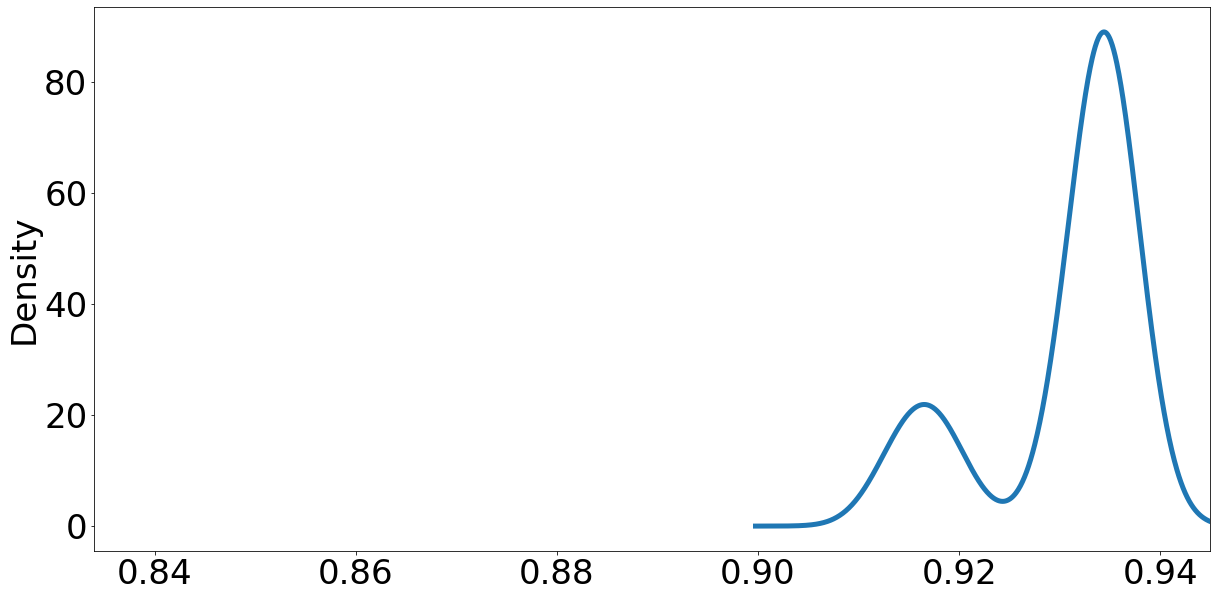

101it [00:00, 36939.72it/s]
100%|##########| 100/100 [00:00<00:00, 380.10it/s]


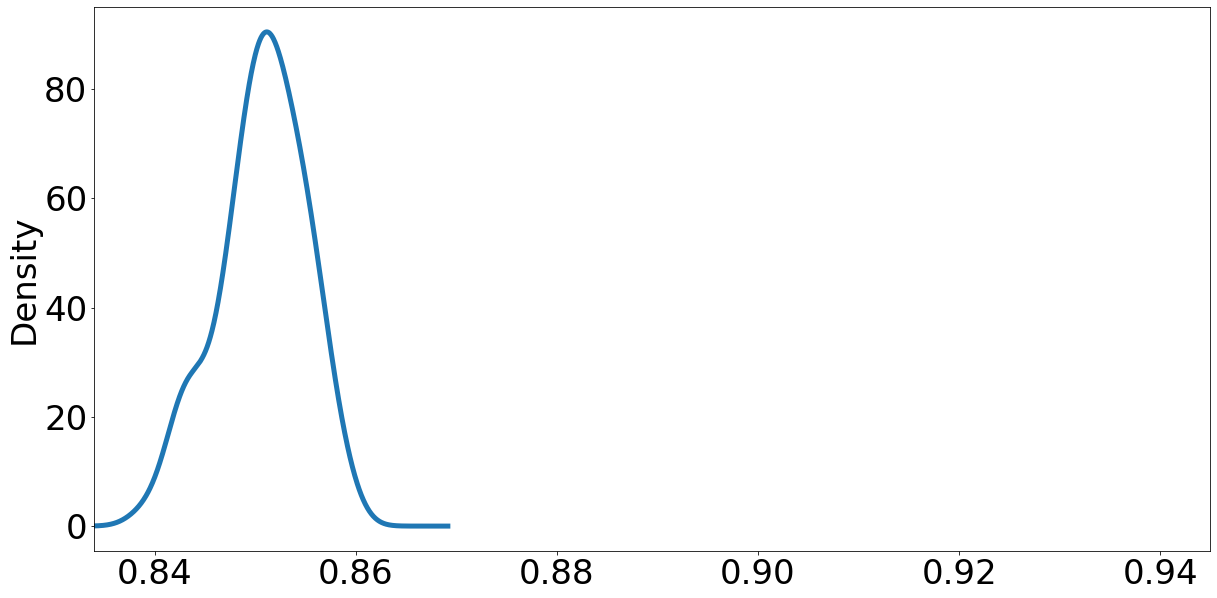

102it [00:00, 34241.96it/s]
100%|##########| 100/100 [00:00<00:00, 392.25it/s]


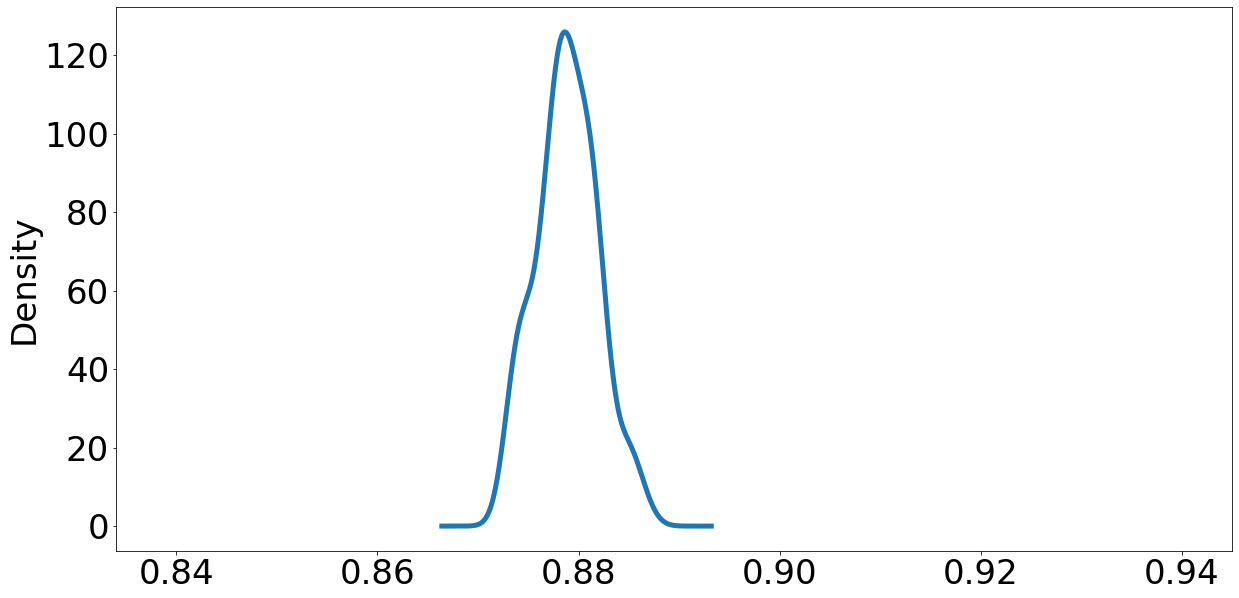

In [7]:
densenet_acc = plot_kde_only('densenet', 'cifar10')
mobilenet_acc = plot_kde_only('mobilenet', 'cifar10')
resnet_acc = plot_kde_only('resnet', 'cifar10')

### Combining the plots

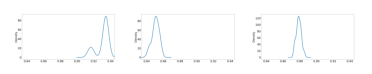

In [24]:
# add the kdes together
figure = plt.Figure(figsize=(15, 10))

dense_cifar10 = plt.imread("/home/dev/deepts/plots/image_classification/analysis/kde_densenet_cifar10.png")
mobile_cifar10 = plt.imread("/home/dev/deepts/plots/image_classification/analysis/kde_mobilenet_cifar10.png")
resnet_cifar10 = plt.imread("/home/dev/deepts/plots/image_classification/analysis/kde_resnet_cifar10.png")


 
row1 = np.vstack([dense_cifar10])
row2 = np.vstack([mobile_cifar10])
row3 = np.vstack([resnet_cifar10])


 
plt.imshow(np.hstack([row1, row2, row3]))
plt.axis("off")
plt.tight_layout()
plt.savefig("/home/dev/deepts/plots/kde_func/epoch100/all_kde_image_horison.png", dpi=500)


# Find 5, 10, 15, 20 seeds for ked

In [9]:
plt.style.use(['default'])

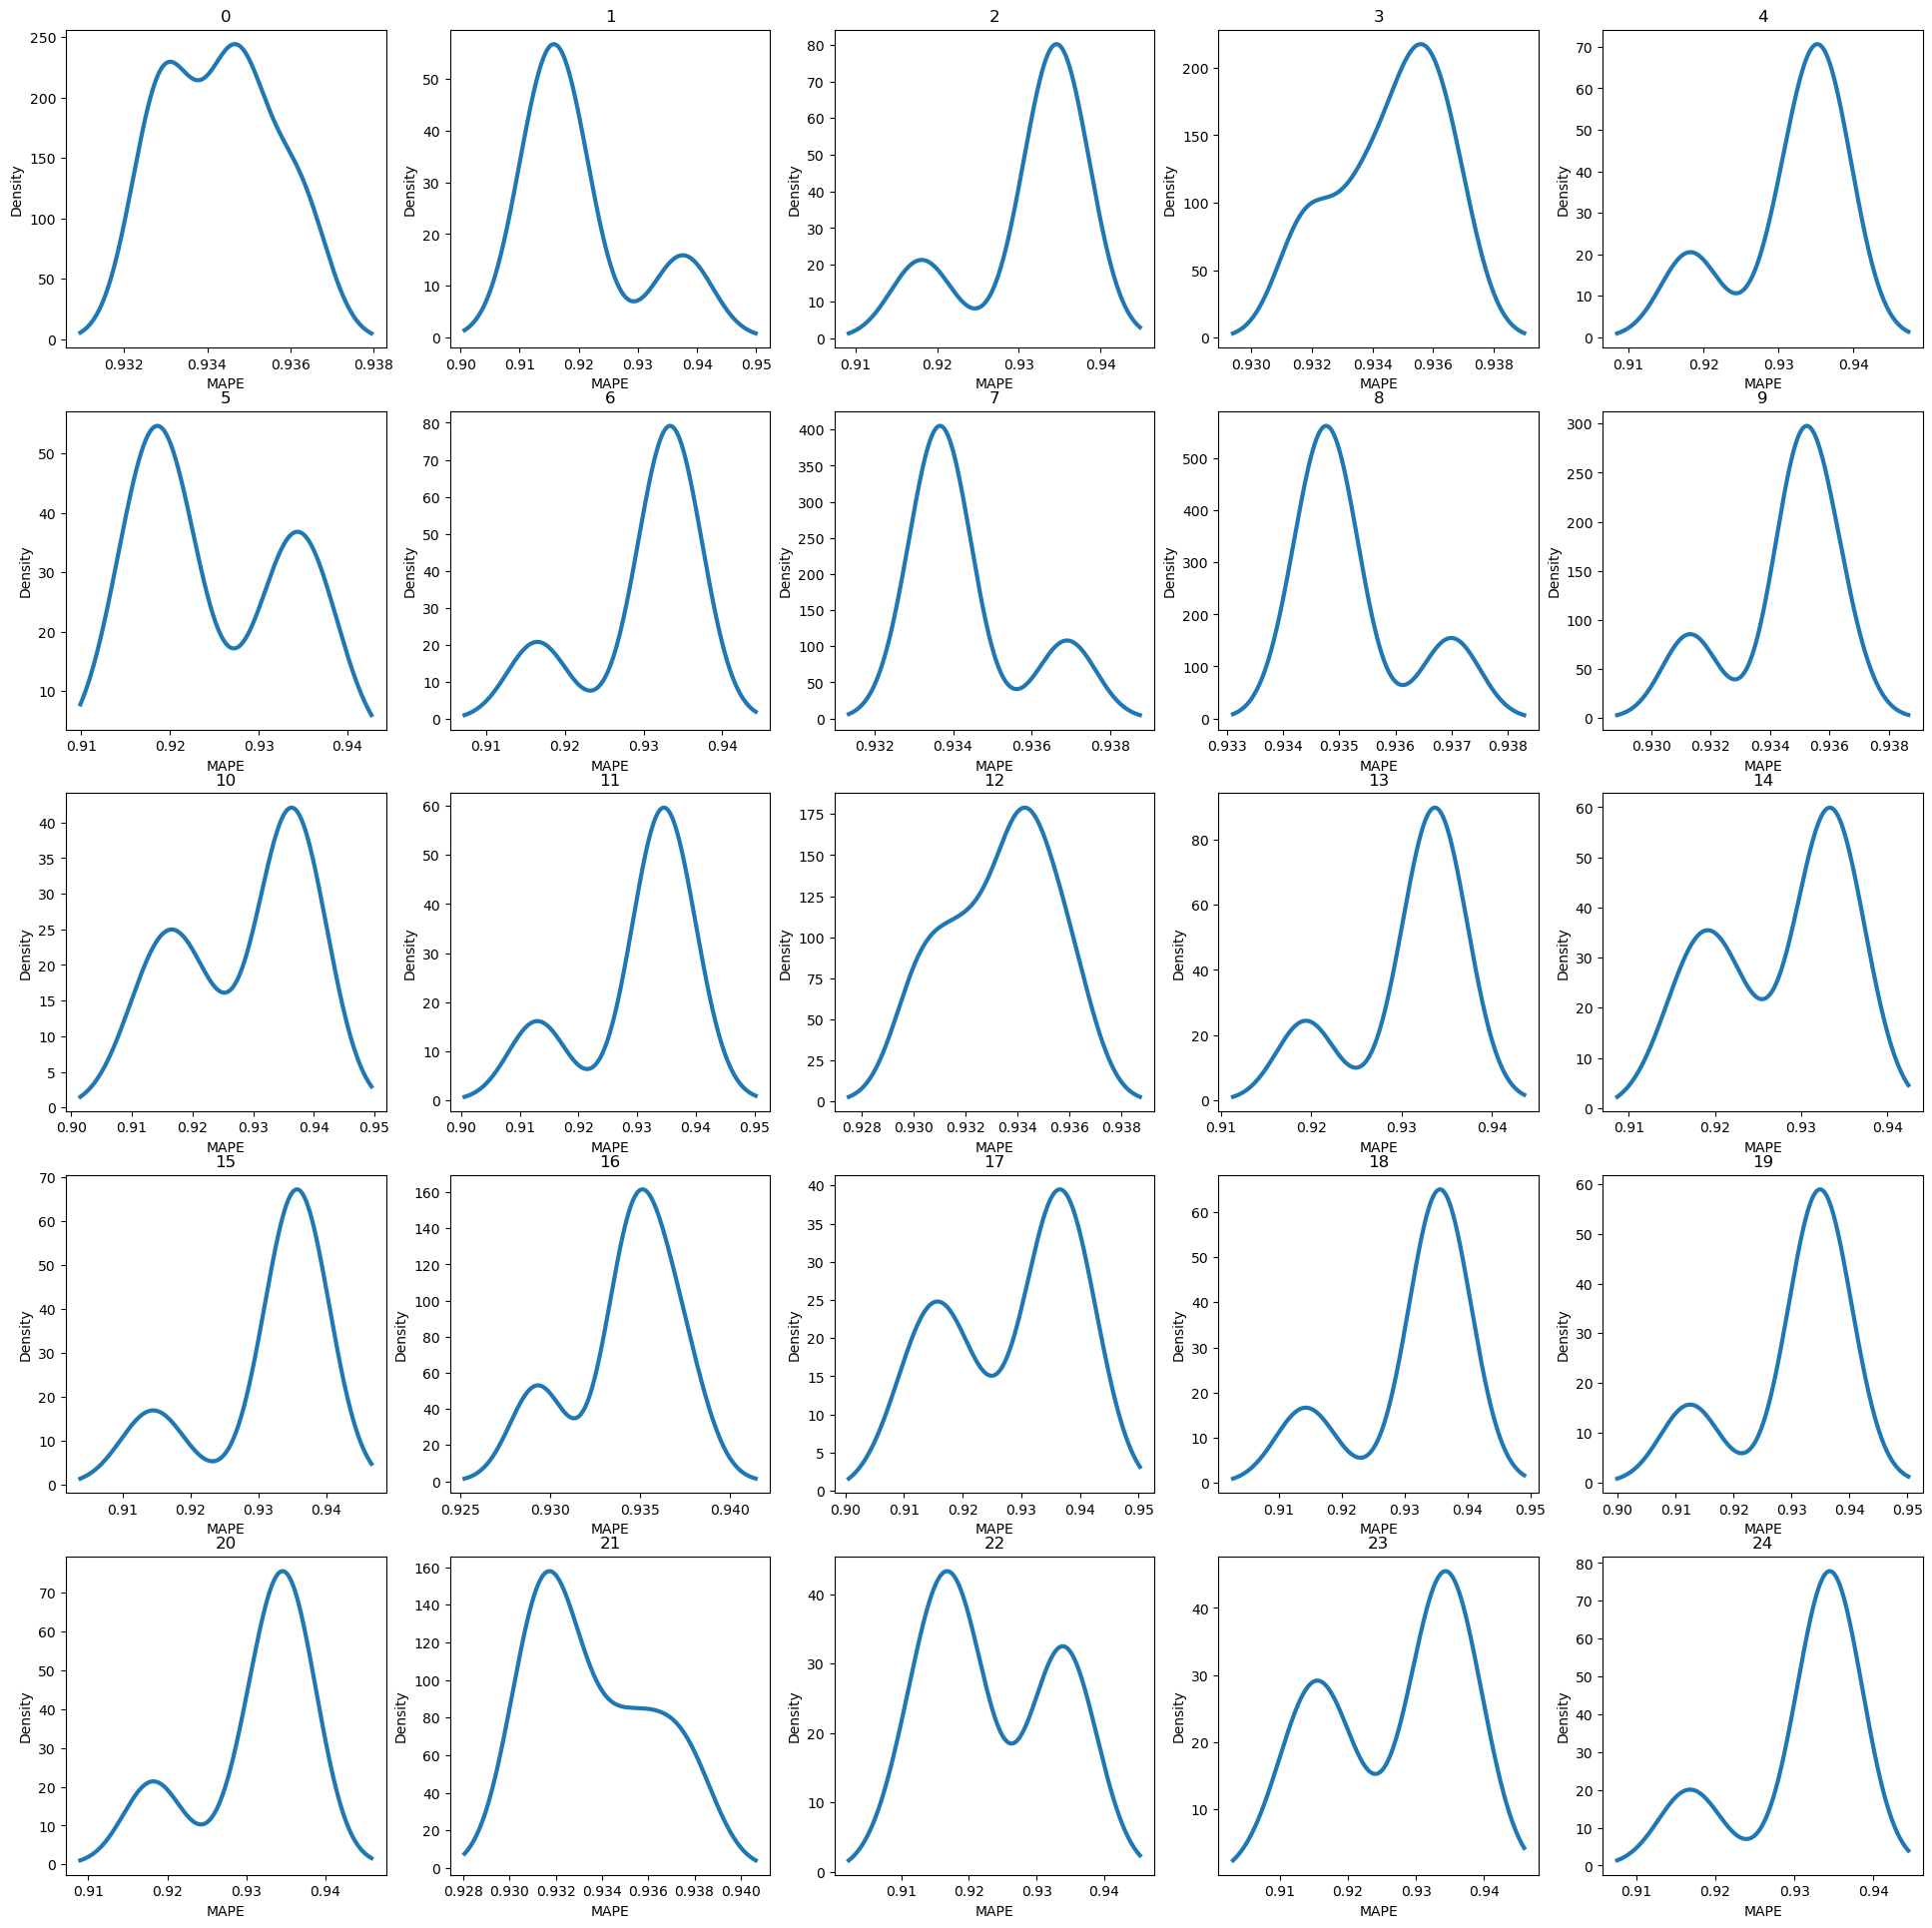

In [17]:
from numpy import random

seed_number = 5
# five seeds
rand_5 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(densenet_acc[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    # ax.set_xlim(0.90,0.95)
    ax.set_title(i)
    rand_5.append(rand_idx)

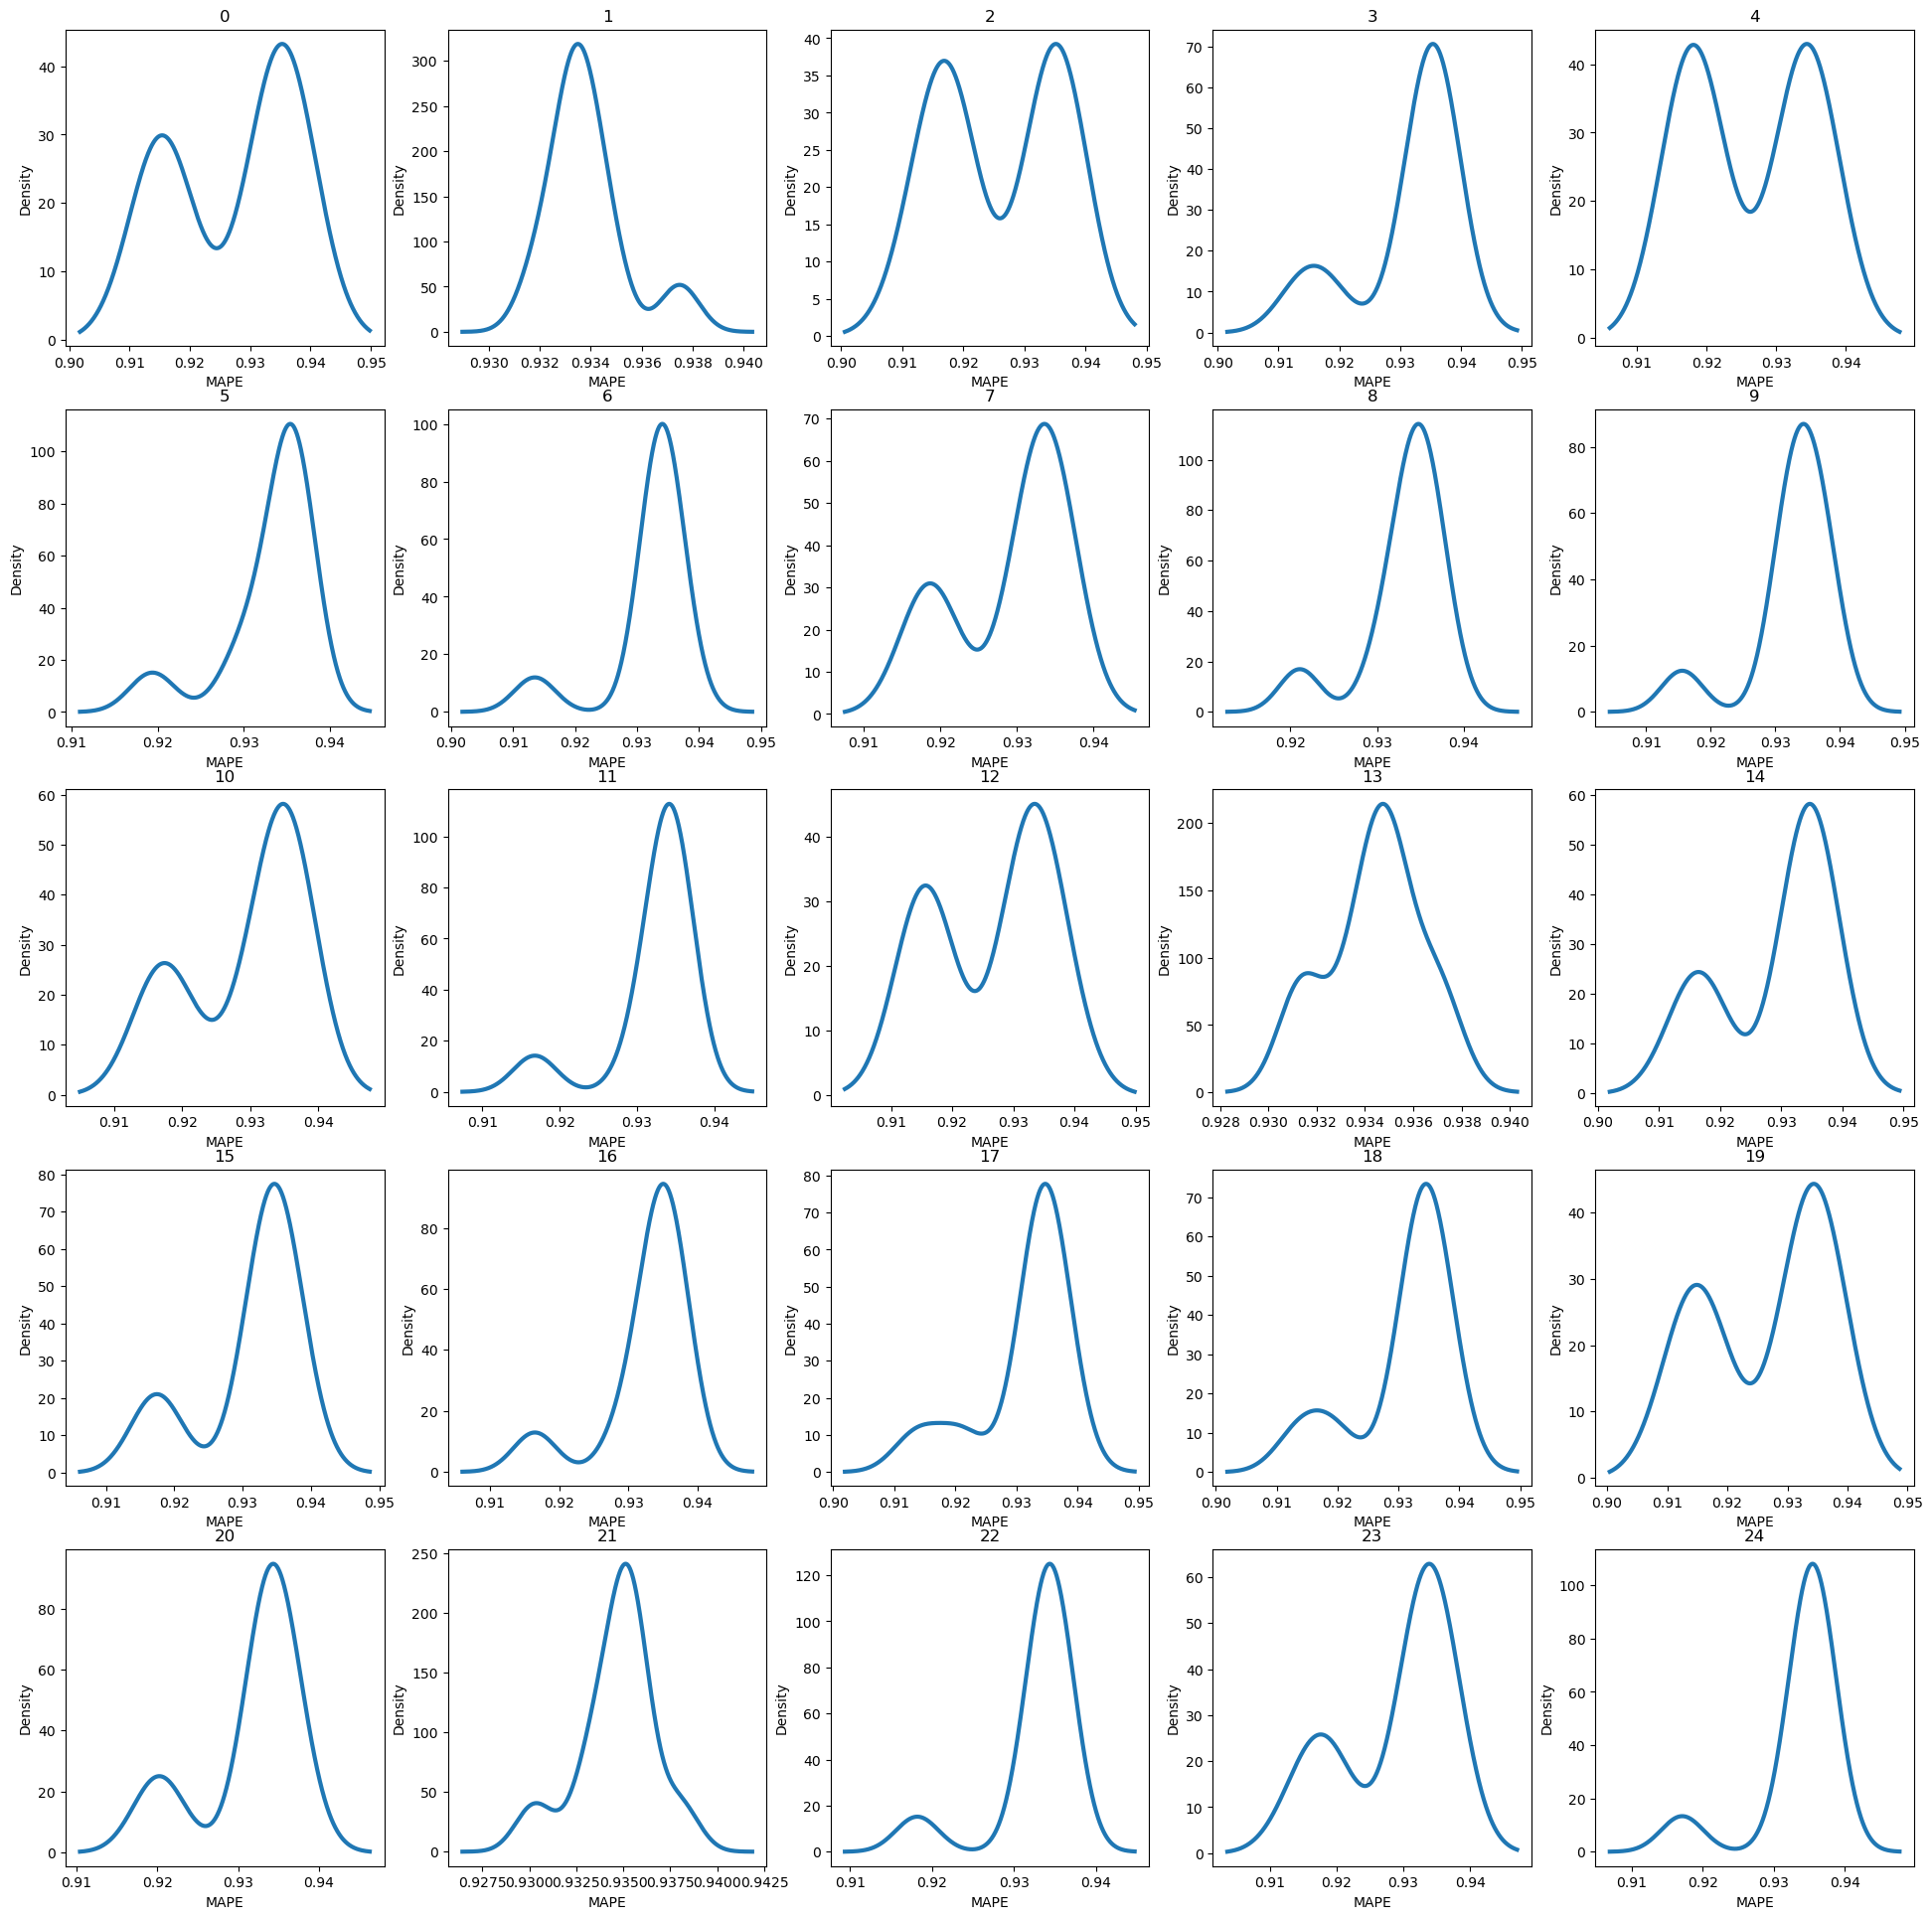

In [16]:
from numpy import random

seed_number = 10
# five seeds
rand_10 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(densenet_acc[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    # ax.set_xlim(0.90,0.95)
    ax.set_title(i)
    rand_10.append(rand_idx)

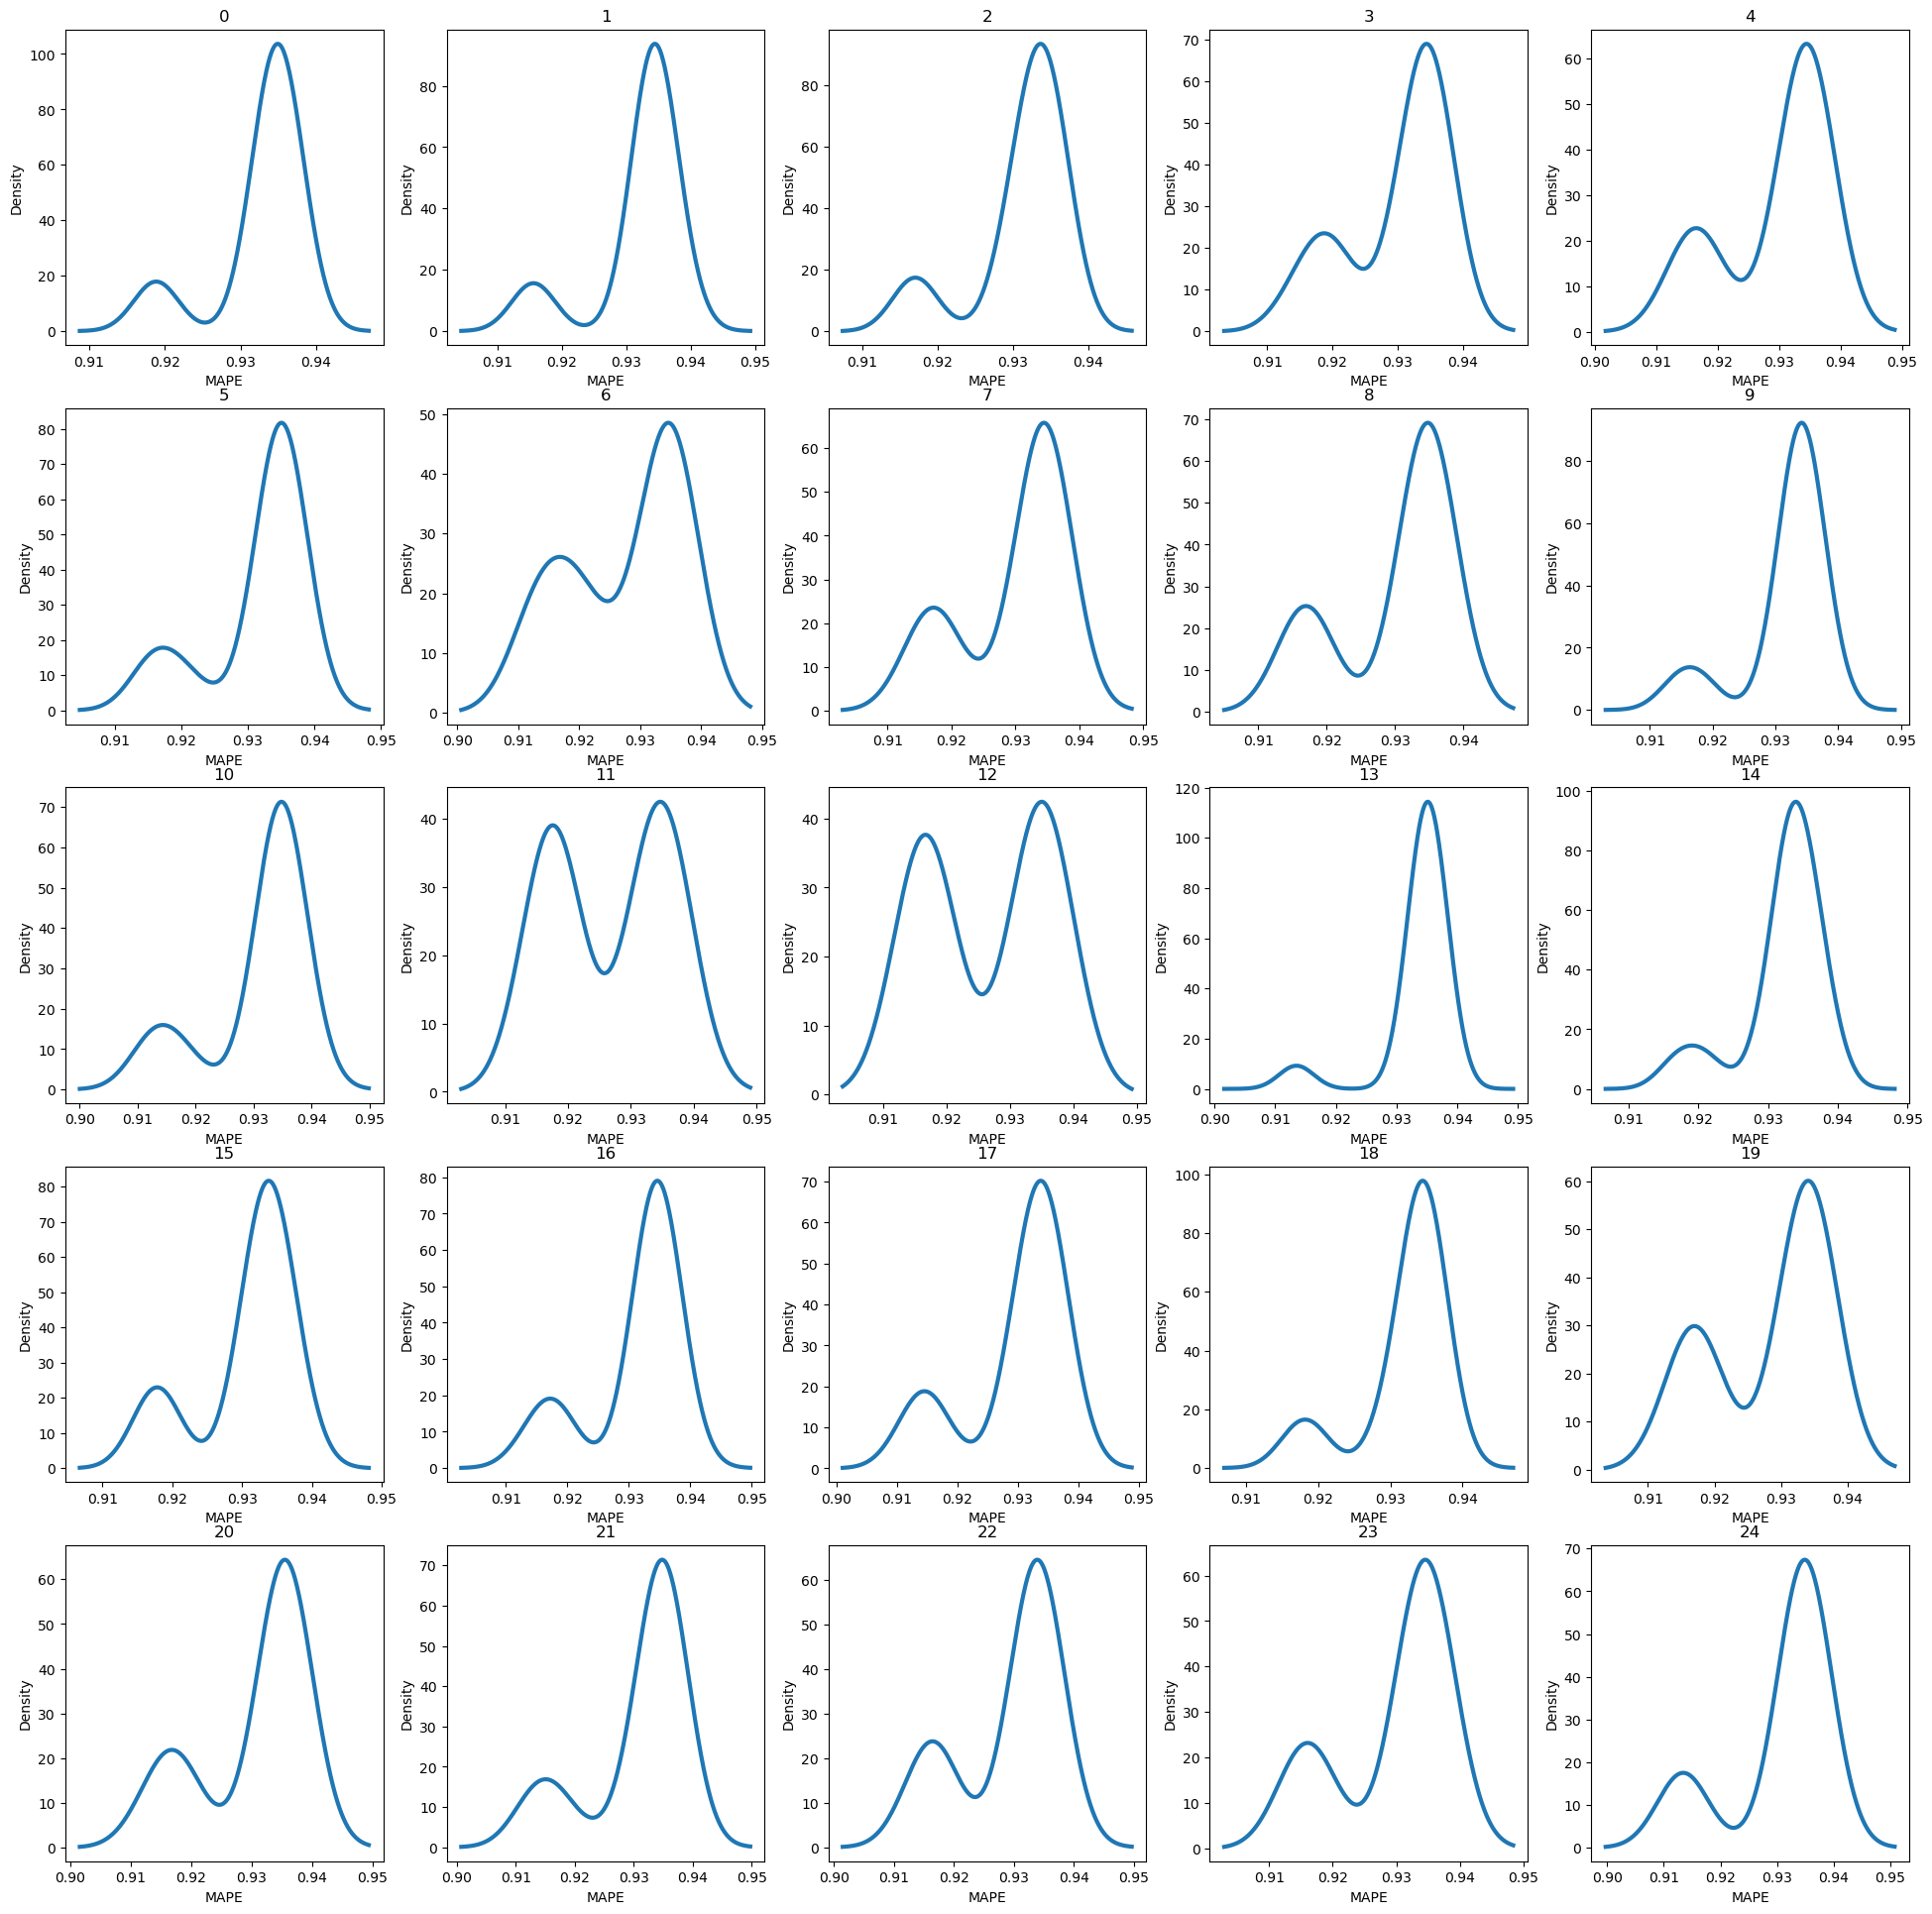

In [18]:
seed_number = 15
# five seeds
rand_15 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(densenet_acc[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    # ax.set_xlim(0.90,0.95)
    ax.set_title(i)
    rand_15.append(rand_idx)

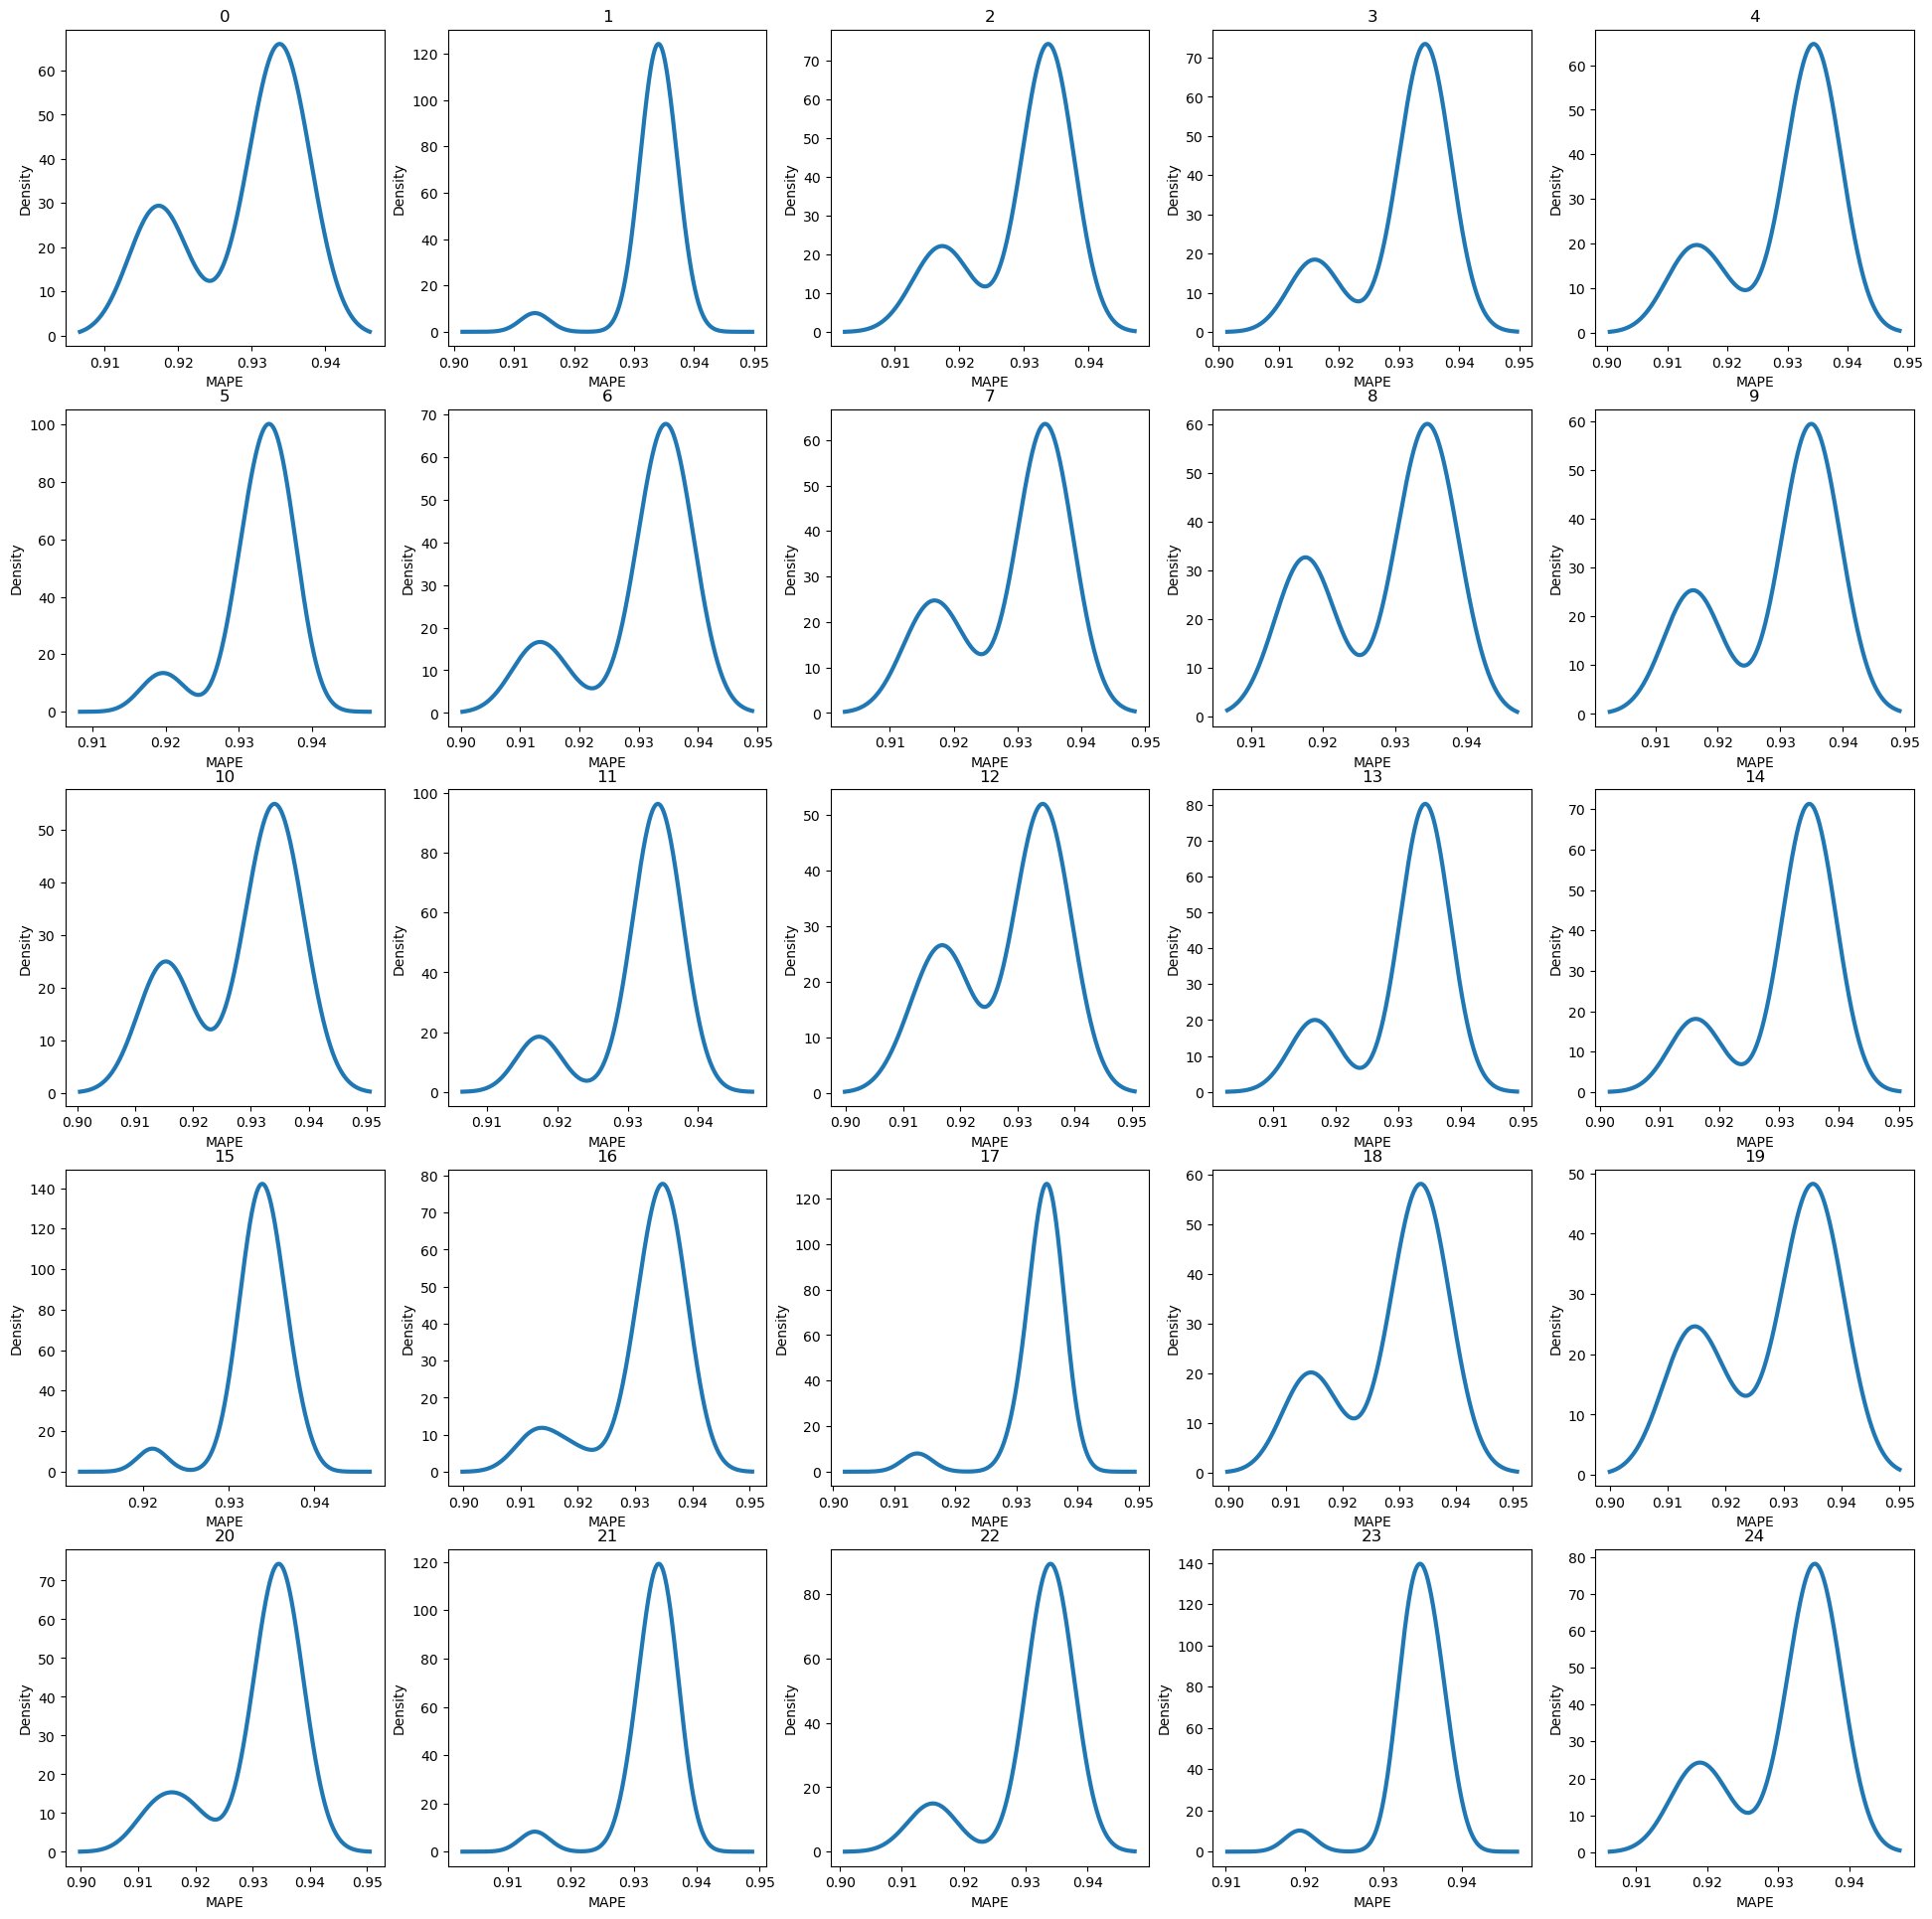

In [20]:
seed_number = 20
# five seeds
rand_20 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(densenet_acc[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    # ax.set_xlim(0.90,0.95)
    ax.set_title(i)
    rand_20.append(rand_idx)

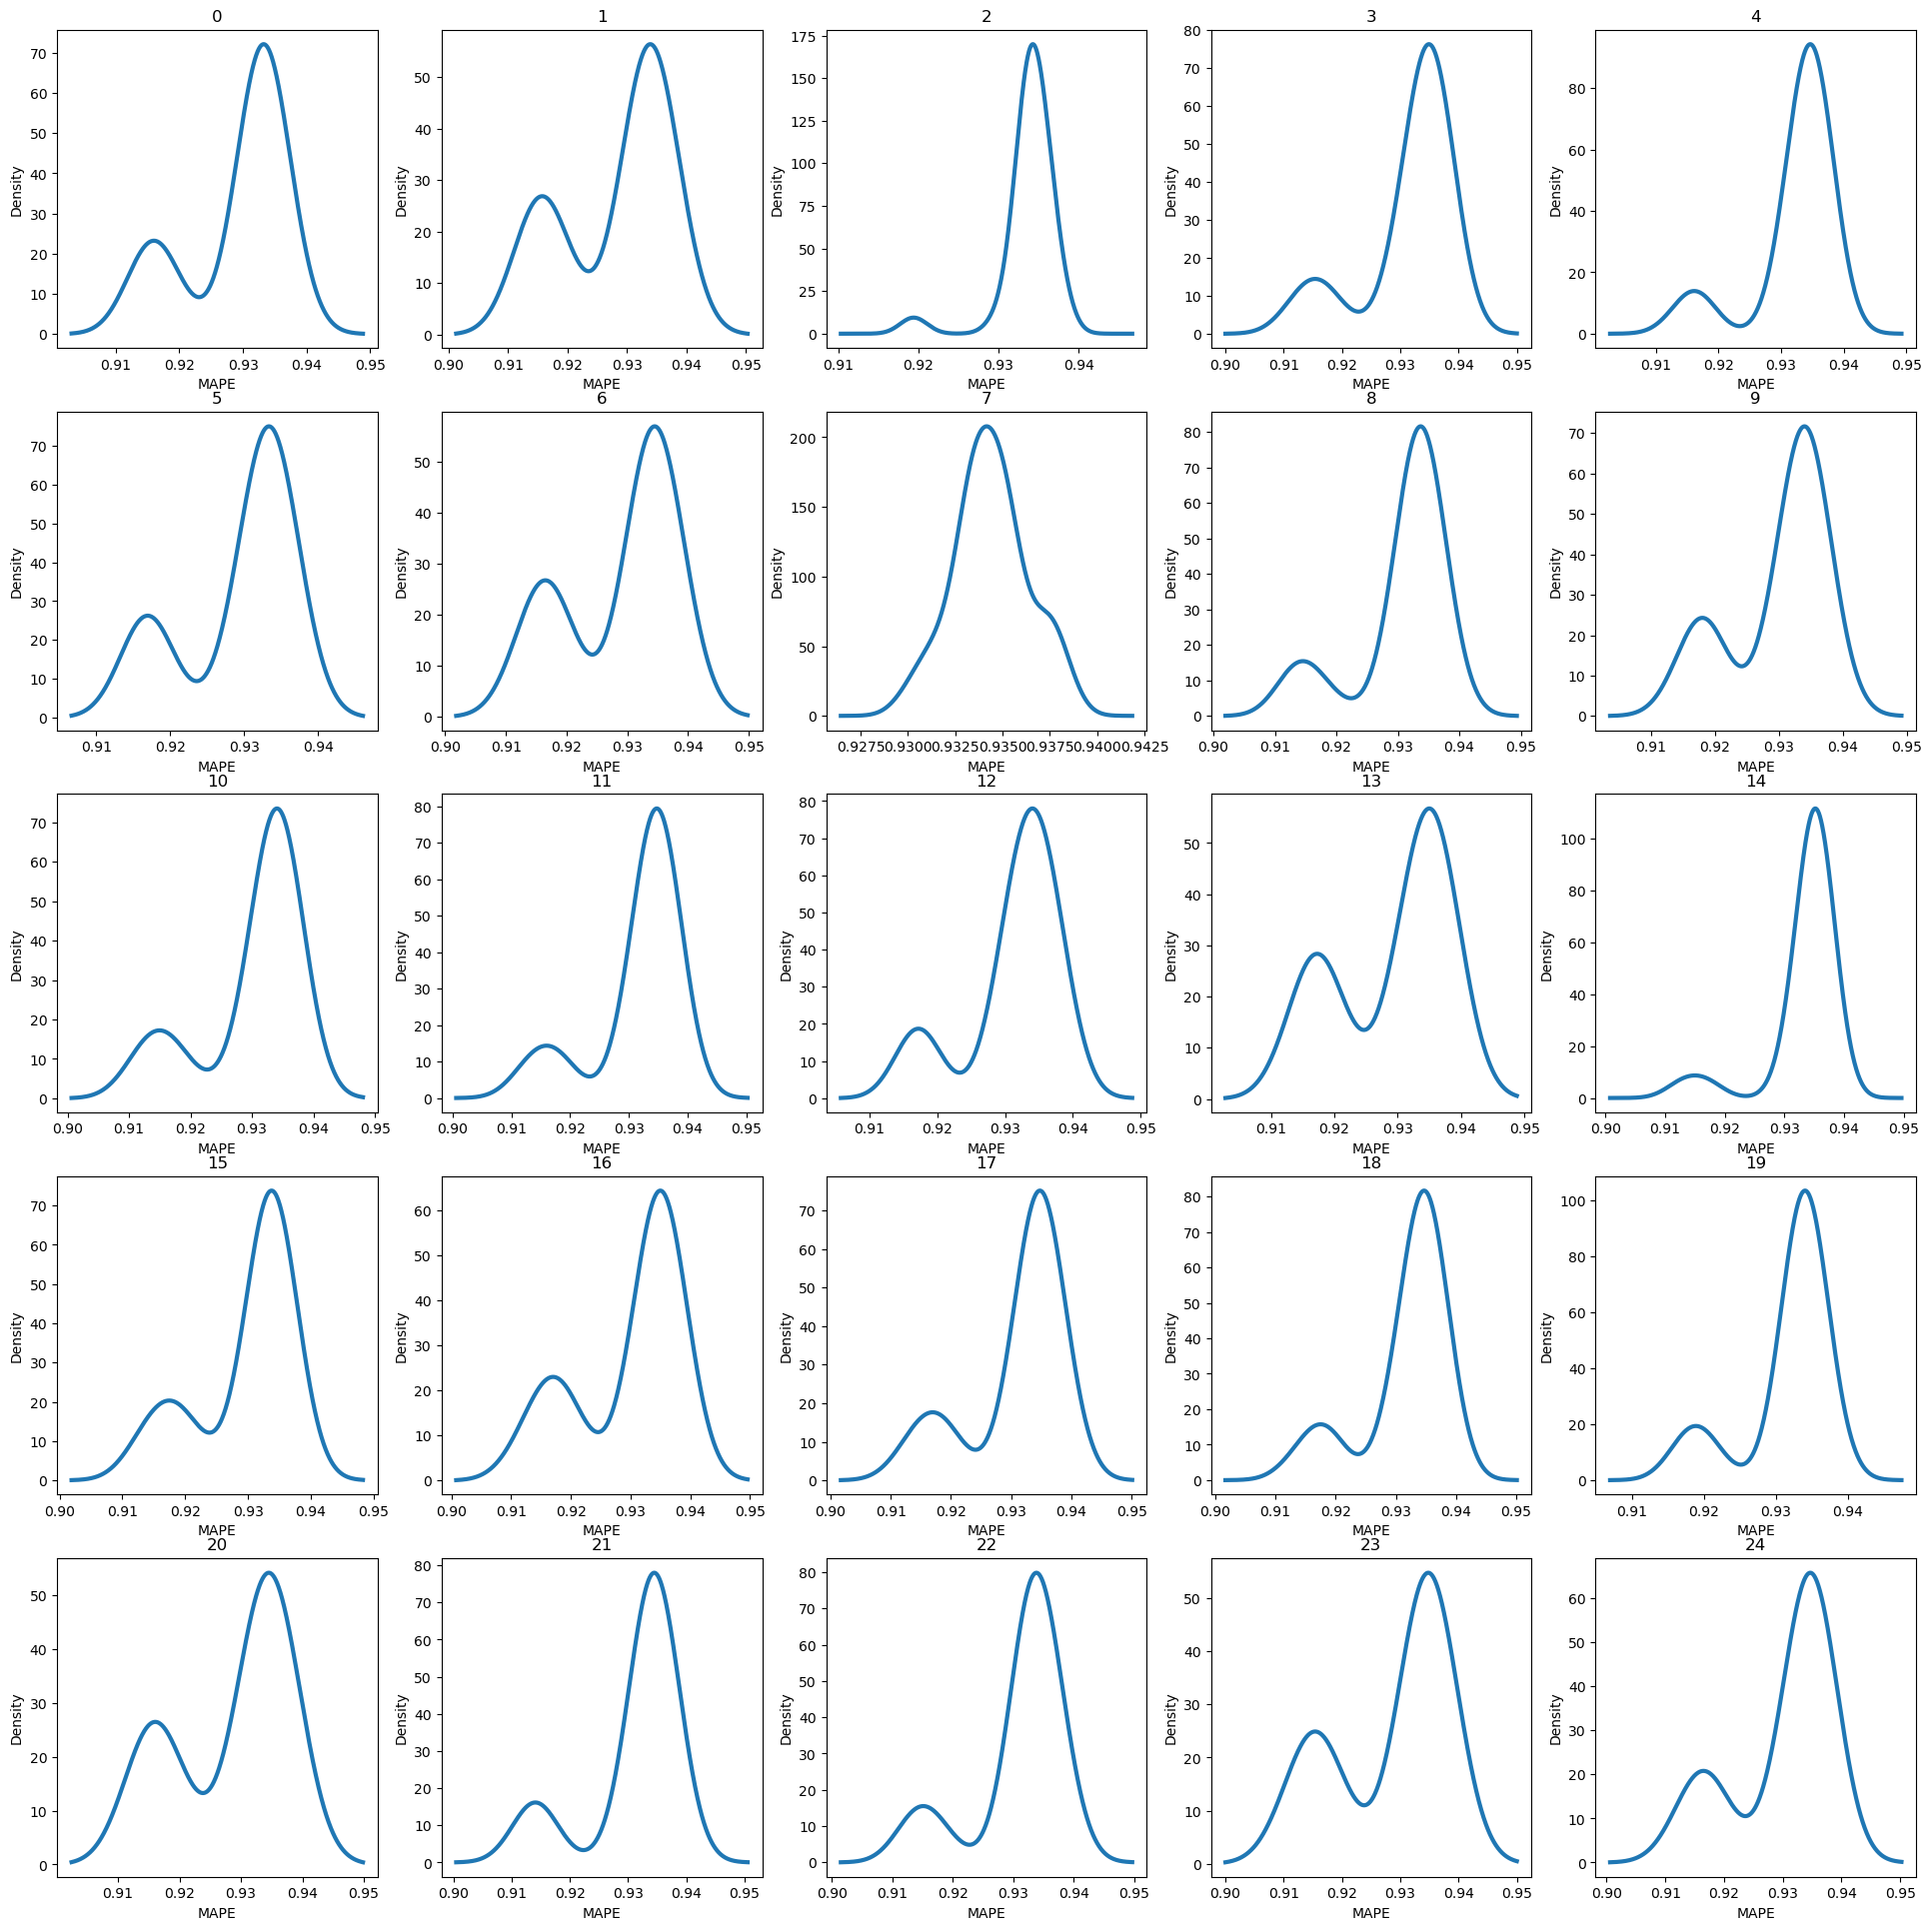

In [21]:
seed_number = 25
# five seeds
rand_25 = []
fig, axs = plt.subplots(5, 5, figsize=(24,24))
for i, ax in enumerate(axs.flat):
    rand_idx = random.randint(0, 99, size=seed_number)
    pd.Series(densenet_acc[rand_idx]).plot.kde(0.5, ax=ax, linewidth=3)
    ax.set_xlabel('MAPE')
    # ax.set_xlim(0.90,0.95)
    ax.set_title(i)
    rand_25.append(rand_idx)

## Mixing the kdes in one plot

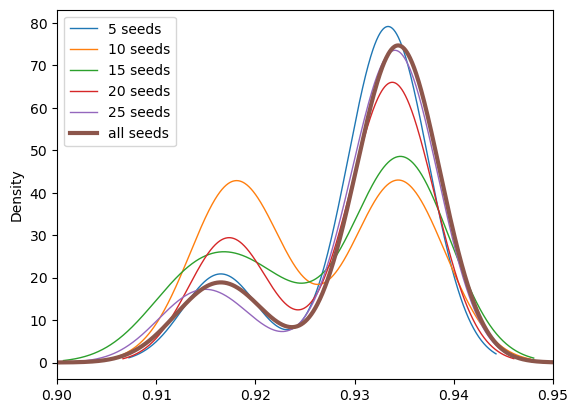

In [26]:
pd.Series(densenet_acc[rand_5[6]]).plot.kde(0.5, linewidth=1, label='5 seeds')
pd.Series(densenet_acc[rand_10[4]]).plot.kde(0.5, linewidth=1, label='10 seeds')
pd.Series(densenet_acc[rand_15[6]]).plot.kde(0.5, linewidth=1, label='15 seeds')
pd.Series(densenet_acc[rand_20[0]]).plot.kde(0.5, linewidth=1, label='20 seeds')
pd.Series(densenet_acc[rand_25[10]]).plot.kde(0.5, linewidth=1, label='25 seeds')
pd.Series(densenet_acc).plot.kde(0.5, linewidth=3, label='all seeds')
plt.xlim(0.90,0.95)
ax.set_xlabel('MAPE')
plt.legend()
plt.savefig('/home/dev/deepts/plots/kde_func/epoch100/kde_sampling_9.png')

## kde plot of predictions

<Figure size 432x288 with 0 Axes>

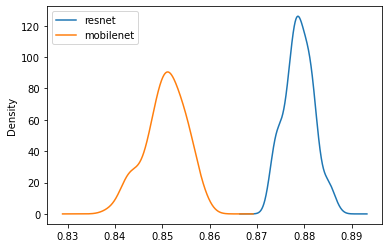

In [ ]:
acc_arr1 = make_acc_arr_resnet(image_pred_df1)
acc_arr2 = make_acc_arr(image_pred_df2)
# fig, ax = plt.subplot()
fig = plt.figure()
ax = pd.DataFrame(acc_arr1).plot.kde()
pd.DataFrame(acc_arr2).plot.kde(ax=ax)
ax.legend([model_name1, model_name2])


In [19]:
top_element = 10
# sort the accuracy array
acc_arr1.sort()
# get top and low
low_acc1 = acc_arr1[:top_element]
top_acc1 = acc_arr1[-top_element:]

# get top and low
low_acc2 = acc_arr2[:top_element]
top_acc2 = acc_arr2[-top_element:]
low_acc2, low_acc1, top_acc1, top_acc2


(array([0.8429, 0.8498, 0.8484, 0.8514, 0.8481, 0.8555, 0.8494, 0.8492,
        0.8538, 0.839 ]),
 array([0.8731, 0.8733, 0.8734, 0.8735, 0.8737, 0.8738, 0.874 , 0.8741,
        0.8741, 0.8744]),
 array([0.8824, 0.8825, 0.8828, 0.8834, 0.8845, 0.8846, 0.8851, 0.8853,
        0.8854, 0.8865]),
 array([0.8464, 0.8502, 0.8482, 0.8465, 0.848 , 0.8562, 0.8527, 0.8538,
        0.8501, 0.8509]))

<Figure size 432x288 with 0 Axes>

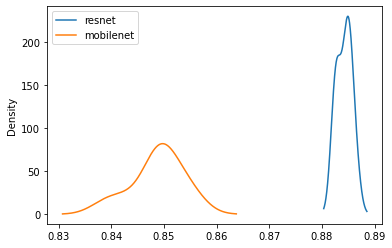

In [20]:
# know compare the top of bad and low of good
fig = plt.figure()
ax = pd.DataFrame(top_acc1).plot.kde()
pd.DataFrame(low_acc2).plot.kde(ax=ax)
ax.legend([model_name1, model_name2])